# Setup - Do once (Only in Colab)

In [0]:
try:
    import google.colab
    IN_COLAB = True
    
    from google.colab import drive
    drive.mount('/content/drive')

    import os
    os.chdir('/content/drive/My Drive/Colab Notebooks/RoboAdvisor/notebooks')
    print('Working directory changed to ' + os.getcwd())  

except:
    IN_COLAB = False




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working directory changed to /content/drive/My Drive/Colab Notebooks/RoboAdvisor/notebooks


In [0]:
if (IN_COLAB):
    !pip install PyPortfolioOpt==0.5.3
    !pip install pandas==0.22.0
    !pip install zipline==1.3.0
    !pip install matplotlib==3.1.2
    !pip install deap==1.3.1
    !pip install pyfolio
    !pip install cvxopt
    !pip install yahoofinancials


  Using cached https://files.pythonhosted.org/packages/52/3f/f6a428599e0d4497e1595030965b5ba455fd8ade6e977e3c819973c4b41d/pandas-0.25.3-cp36-cp36m-manylinux1_x86_64.whl
ERROR: zipline 1.3.0 has requirement pandas<=0.22,>=0.18.1, but you'll have pandas 0.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


  Using cached https://files.pythonhosted.org/packages/da/c6/0936bc5814b429fddb5d6252566fe73a3e40372e6ceaf87de3dec1326f28/pandas-0.22.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.22.0 which is incompatible.
ERROR: pyportfolioopt 0.5.3 has requirement pandas<0.26.0,>=0.25.3, but you'll have pandas 0.22.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.22.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.22.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.22.0 which is incompatible.
ERROR: featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
ERROR: fbprophet 0.6 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: pandas 0.25

In [0]:
if (IN_COLAB):
    # Some files need to be modified
    !ls /root
    #!cp setup/extension.py ~/.zipline/extension.py
    !cp setup/benchmarks.py /usr/local/lib/python3.6/dist-packages/zipline/data/benchmarks.py
    !cp setup/loader.py /usr/local/lib/python3.6/dist-packages/zipline/data/loader.py


cp: cannot stat 'setup/benchmarks.py': No such file or directory
cp: cannot stat 'setup/loader.py': No such file or directory


## Note: After installing modules, please ensure that you restart the runtime!

In [0]:
import pandas as pd
print("PANDAS: " + pd.__version__)
print("If you do not see 0.22.0, please restart the runtime!")

PANDAS: 0.22.0
If you do not see 0.22.0, please restart the runtime!


# Input and Function definitions

In [0]:
#@title Input Variables
_visualise = True #@param ["True", "False"] {type:"raw"}
_bundle_start_date = '2015-01-05' #@param {type:"date"}
_bundle_end_date = '2020-04-03' #@param {type:"date"}
# _end_date = '2019-12-27' #@param {type:"date"}
_capital = 1000000 #@param {type:"slider", min:1000, max:1000000, step:1000}
_benchmark = 'SPY' #@param ["SPY"] {allow-input: true}
_history = 500 #@param {type:"slider", min:100, max:500, step:1}
_calendar = 'NYSE' #@param ["NYSE"] {allow-input: true}

# set algo start date equal to bundle start date
# _start_date = _bundle_start_date
# _end_date = _bundle_end_date

_start_date = '2018-07-21'
_end_date = '2020-04-03'

args = {
    'mode': '1',
    'visualise': _visualise, 
    'start_date': _start_date,
    'end_date': _end_date,
    'bundle_start_date': _bundle_start_date,
    'bundle_end_date': _bundle_end_date,
    'bundle': 'robo-advisor_US',
    'timezone': 'US/Mountain',
    'calendar': _calendar,
    'capital': _capital,
    'benchmark': _benchmark,
    'history': _history
}


### Register and ingest bundle

In [0]:
import sys
sys.path.append('..')  # add parent folder to sys path

import pandas as pd
from zipline.data.bundles import register, ingest, unregister, bundles
from zipline.data.bundles.csvdir import csvdir_equities

import os
from zipline.utils.run_algo import load_extensions

start_session = pd.Timestamp(args['bundle_start_date'], tz='utc')
end_session = pd.Timestamp(args['bundle_end_date'], tz='utc')
bundle_name = args['bundle']

load_extensions(default=True, extensions=[], strict=True, environ=os.environ)

# unregister bundle if already exists
if bundle_name in list(bundles):
    unregister(bundle_name)

# register and ingest the bundle
register(
    bundle_name,  # name we select for the bundle
    csvdir_equities(        
        ['daily'], # name of the directory as specified above (named after data frequency)        
        '../data', # path to directory containing the data
    ),
    calendar_name=args['calendar'],  # US Equities
    start_session=start_session,
    end_session=end_session
)


ingest(bundle_name)



 | BND: sid 0
 | BNDX: sid 1
 | DBC: sid 2
 | GLD: sid 3
 | IEF: sid 4
 | SPY: sid 5
 | TLT: sid 6
 | VTI: sid 7
 | VXUS: sid 8
 | XLB: sid 9
 | XLC: sid 10
 | XLE: sid 11
 | XLF: sid 12
 | XLI: sid 13
 | XLK: sid 14
 | XLP: sid 15
 | XLRE: sid 16
 | XLU: sid 17
 | XLV: sid 18
 | XLY: sid 19


Bundle details: RegisteredBundle(calendar_name='NYSE', start_session=Timestamp('2015-01-05 00:00:00+0000', tz='UTC'), end_session=Timestamp('2020-04-03 00:00:00+0000', tz='UTC'), minutes_per_day=390, ingest=<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x7f4ffe2442e8>>, create_writers=True)

Asset list: [Equity(0 [BND]), Equity(1 [BNDX]), Equity(2 [DBC]), Equity(3 [GLD]), Equity(4 [IEF]), Equity(5 [SPY]), Equity(6 [TLT]), Equity(7 [VTI]), Equity(8 [VXUS]), Equity(9 [XLB]), Equity(10 [XLC]), Equity(11 [XLE]), Equity(12 [XLF]), Equity(13 [XLI]), Equity(14 [XLK]), Equity(15 [XLP]), Equity(16 [XLRE]), Equity(17 [XLU]), Equity(18 [XLV]), Equity(19 [XLY])]



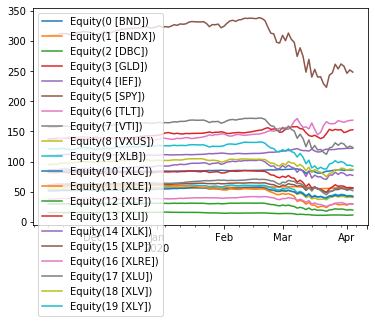

In [0]:
# Verify that bundle has been registered 
from zipline.data import bundles
bundle = bundles.load(bundle_name)
assets = bundle.asset_finder.retrieve_all(bundle.asset_finder.sids)
symbols = [a.symbol for a in assets]

print('Bundle details:', bundles.bundles[bundle_name])
print('\nAsset list:', bundle.asset_finder.retrieve_all(bundle.asset_finder.sids))
print()

# See sample of data
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
my_data = DataPortal(bundle.asset_finder, get_calendar(args['calendar']),
                       bundle.equity_daily_bar_reader.first_trading_day,
                       equity_minute_reader=bundle.equity_minute_bar_reader,
                       equity_daily_reader=bundle.equity_daily_bar_reader,
                       adjustment_reader=bundle.adjustment_reader)

my_data_pricing = my_data.get_history_window(assets, end_session, 100, '1d', 'close', 'daily')
my_data_pricing.plot()


# Run Algorithms

In [0]:
# initialise variables
import matplotlib.pyplot as plt
from zipline.api import *
from zipline.api import symbols
from zipline.utils.calendars import get_calendar
from zipline import run_algorithm
from datetime import datetime, timedelta
import pytz

tz = pytz.timezone(args['timezone'])
bundle_name = args['bundle'] # bundle = 'alpaca'

raw_start = tz.localize(datetime.strptime(args['start_date'], '%Y-%m-%d'))

# calculate actual start date, 
# taking into account required HISTORY of trading days for given trading calendar
tc = get_calendar(args['calendar'])
# start = tc.sessions_window(start_session, args['history'])[-1] # start = raw_start + trading_days(HISTORY)
start = raw_start

end = tz.localize(datetime.strptime(args['end_date'], '%Y-%m-%d'))
capital_base = args['capital'] # 100000.00 

print(f'Algorithm will start with capital of ${capital_base:,d}.')
print('Backtest from %s to %s' % (start, end))
print('History will be collected for %d trading-days from %s' % (args['history'], raw_start))

Algorithm will start with capital of $1,000,000.
Backtest from 2018-07-21 00:00:00-06:00 to 2020-04-03 00:00:00-06:00
History will be collected for 500 trading-days from 2018-07-21 00:00:00-06:00


## Portfolios based on asset classes

### Algorithm 1 - pre-assembled fixed basket of ETFs with constant-mix rebalancing 

1A - Vanguard Core Series with risk-baskets

In [0]:
import sys
sys.path.append('..')  # add parent folder to sys path
from tqdm import tqdm
from algorithms import CRBAlgorithm, run
a_vanguard = CRBAlgorithm(verbose=False, grp="VANGUARD", subgrp="CORE_SERIES")

enabled = False

if (enabled):
    # run algorithm for a range of risk levels
    perfData = []
    step = 5
    for r in tqdm(range(0, 10, step)):
        a_vanguard.risk_level = r
        perfData.append(run("RISK%i" % r, a_vanguard, bundle_name, start, end, capital_base, analyze=False))
                
#         perfData.append(("RISK%i" % r, run_algorithm(start=start, end=end,
#                         initialize=a_vanguard.initialize, handle_data=a_vanguard.handle_data,                            
#                         capital_base=capital_base, environ=os.environ, bundle=bundle_name
#                         # analyze=analyze,
#         )))

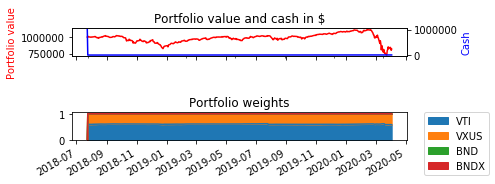

In [0]:
# Compare daily vs monthly rebalancing
a_vanguard.risk_level = 10
a_vanguard.rebalance_freq = 'daily'
test = []
test.append(run("rebal daily", a_vanguard, bundle_name, start, end, capital_base, analyze=True))

a_vanguard.rebalance_freq = 'monthly'
test.append(run("rebal monthly", a_vanguard, bundle_name, start, end, capital_base, analyze=False))

from utils import print_table_from_perf_array
print_table_from_perf_array(test, None)

1B - Ray Dalio's simplified "All Weather" Portfolio that is designed to weather through any financial climate.
It advocates the following distribution:
* 30% stocks (eg VTI)
* 40% long-term bonds (eg TLT)
* 15% intermediate-term bonds (eg IEF)
* 7.5% gold (eg GLD)
* 7.5% commodities (eg DBC)

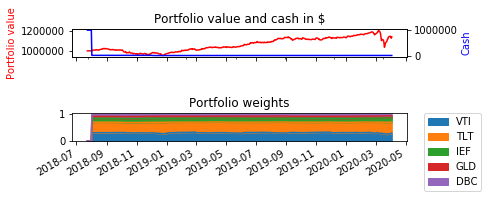

In [0]:
from algorithms import CRBAlgorithm
a_dalio = CRBAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER")

if ('perfData' not in locals()): perfData = []
perfData.append(run("All Weather", a_dalio, bundle_name, start, end, capital_base))

### Algorithm 2 - pre-assembled fixed basket of ETFs with Modern Portfolio Theory for rebalancing

MPT (max sharpe)


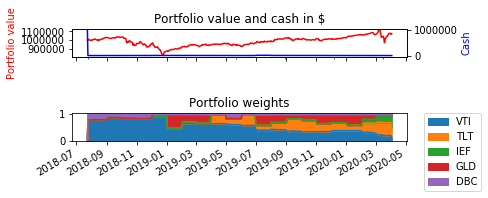

MPT (min volatility)


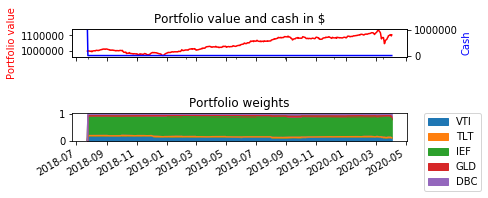

In [0]:
from algorithms import OptAlgorithm

COLLECT_BEFORE_TRADING = False
if ('perfData' not in locals()): perfData = []

# # MPT for max-sharpe
# a_mpt1 = OptAlgorithm(verbose=False, grp="VANGUARD", subgrp="CORE_SERIES", 
#                       collect_before_trading=COLLECT_BEFORE_TRADING,
#                       history=args['history'], objective='max_sharpe')

# # MPT for min-volatility
# a_mpt2 = OptAlgorithm(verbose=False, grp="VANGUARD", subgrp="CORE_SERIES", 
#                       collect_before_trading=COLLECT_BEFORE_TRADING,
#                       history=args['history'], objective='min_volatility')

a_mpt1 = OptAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
                      collect_before_trading=COLLECT_BEFORE_TRADING,
                      history=args['history'], objective='max_sharpe')

# MPT for min-volatility
a_mpt2 = OptAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
                      collect_before_trading=COLLECT_BEFORE_TRADING,
                      history=args['history'], objective='min_volatility')


print('MPT (max sharpe)')
perfData.append(run("MPT (max sharpe)", a_mpt1, bundle_name, start, end, capital_base))

print('MPT (min volatility)')
perfData.append(run("MPT (min volatility)", a_mpt2, bundle_name, start, end, capital_base))

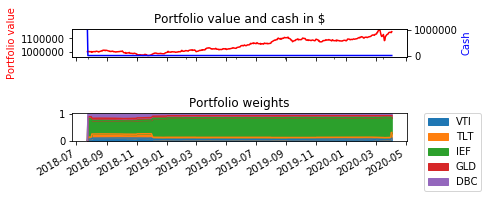

In [0]:
from algorithms import OptAlgorithm

COLLECT_BEFORE_TRADING = False
if ('perfData' not in locals()): perfData = []

# Hierarchical risk parity portfolio
# a_hrp = OptAlgorithm(verbose=False, grp="VANGUARD", subgrp="CORE_SERIES", 
#                       collect_before_trading=COLLECT_BEFORE_TRADING,
#                       history=args['history'], objective='hrp')
a_hrp = OptAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
                      collect_before_trading=COLLECT_BEFORE_TRADING,
                      history=args['history'], objective='hrp')

perfData.append(run("HRP", a_hrp, bundle_name, start, end, capital_base))

### Results Comparison

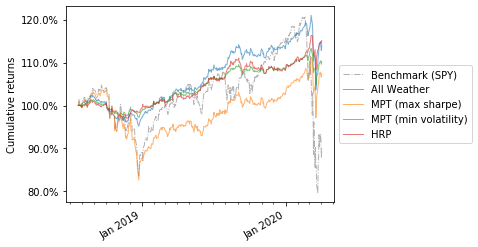

In [0]:
# Get benchmark returns and compare it with our algorithm's returns
from zipline.data.benchmarks import get_benchmark_returns 
from utils import plot_rolling_returns_from_perf_array

bm_returns = get_benchmark_returns(args['benchmark'], start, end)  # requires network connection
bm_returns.name = 'Benchmark (%s)' % args['benchmark']
plot_rolling_returns_from_perf_array(perfData, bm_returns)

In [0]:
from utils import print_table_from_perf_array
print_table_from_perf_array(perfData, bm_returns, True)

## Portfolios based on sectors
with universe of 11 SPDR sector ETFs

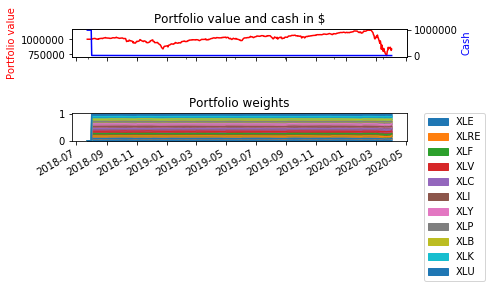

In [0]:
from algorithms import CRBAlgorithm
a_spy1 = CRBAlgorithm(verbose=False, grp="SPDR", subgrp="ALL_SECTORS")

if ('perfSPDR' not in locals()): perfSPDR = []
perfSPDR.append(run("Constant-Rebalancing (Equal weights)", a_spy1, bundle_name, start, end, capital_base))

MPT (max sharpe)


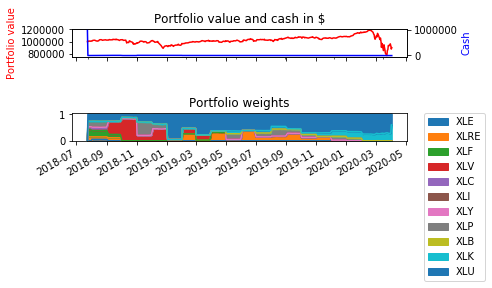

MPT (min volatility)


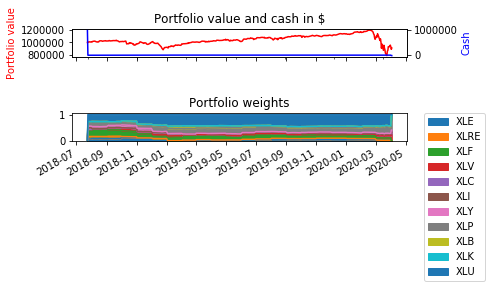

HRP


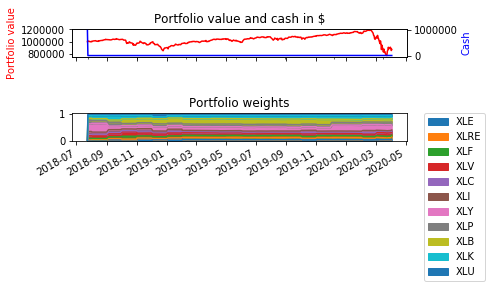

In [0]:
from algorithms import OptAlgorithm
a_spy2_ms = OptAlgorithm(verbose=False, grp="SPDR", subgrp="ALL_SECTORS", 
                      collect_before_trading=False,
                      history=args['history'], objective='max_sharpe')
a_spy2_mv = OptAlgorithm(verbose=False, grp="SPDR", subgrp="ALL_SECTORS", 
                      collect_before_trading=False,
                      history=args['history'], objective='min_volatility')
a_sp2_hrp = OptAlgorithm(verbose=False, grp="SPDR", subgrp="ALL_SECTORS", 
                      collect_before_trading=False,
                      history=args['history'], objective='hrp')

if ('perfSPDR' not in locals()): perfSPDR = []
print("MPT (max sharpe)")
perfSPDR.append(run("MPT (max sharpe)", a_spy2_ms, bundle_name, start, end, capital_base))

print("MPT (min volatility)")
perfSPDR.append(run("MPT (min volatility)", a_spy2_mv, bundle_name, start, end, capital_base))

print("HRP")
perfSPDR.append(run("HRP", a_sp2_hrp, bundle_name, start, end, capital_base))

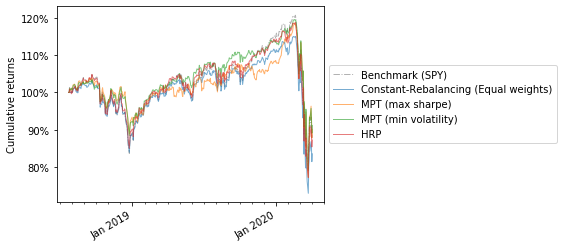

In [0]:
# Get benchmark returns and compare it with our algorithm's returns
from zipline.data.benchmarks import get_benchmark_returns 
from utils import plot_rolling_returns_from_perf_array
from utils import print_table_from_perf_array

bm_returns = get_benchmark_returns(args['benchmark'], start, end)  # requires network connection
bm_returns.name = 'Benchmark (%s)' % args['benchmark']

plot_rolling_returns_from_perf_array(perfSPDR, bm_returns)
print_table_from_perf_array(perfSPDR, bm_returns, True)

### Conclusion: It seems that sector-based portfolio does not benefit much from portfolio optimisation

---

## Use Sentiments as trading signals to optimise portfolio based on asset-classes

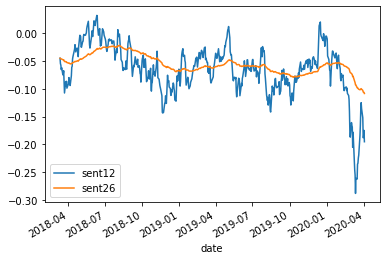

In [0]:
trade_freq = 'weekly'
history = 7

filepath='../data/twitter/sentiments_overall_daily.csv'
social_media = pd.read_csv(filepath, usecols=['date', 'buzz', 'finBERT', 'sent12', 'sent26'])
social_media['date'] = pd.to_datetime(social_media['date'], format="%Y-%m-%d", utc=True)
social_media.set_index('date', inplace=True, drop=True)

social_media[['sent12', 'sent26']].plot()

Buy the index SPY, but use trading signals from the prediction model

Baseline: Buy-and-hold SPY

In [0]:
# Get benchmark returns for comparison
from zipline.data.benchmarks import get_benchmark_returns 
from utils import plot_rolling_returns_from_perf_array
from utils import print_table_from_perf_array

bm_returns = get_benchmark_returns(args['benchmark'], start, end)  # requires network connection
bm_returns.name = 'Benchmark (%s)' % args['benchmark']


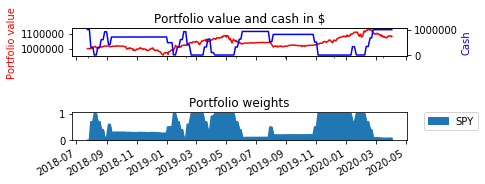

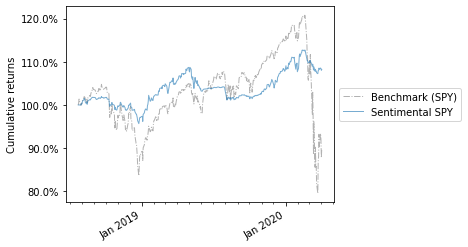

In [0]:
from algorithms import TradingSignalAlgorithm

def trading_fn(stockname, date, lookback):    
    df = social_media
    yesterday_date = date - pd.Timedelta(days=1)
    yesterday_social_media = df.iloc[df.index.get_loc(yesterday_date, method='nearest')]
    
    # if sent12 > sent26 -> buy
    # if sent12 < sent26 -> sell    
    buzz = yesterday_social_media['buzz']
    sentiment = yesterday_social_media['sent12'] - yesterday_social_media['sent26']
    
    signal = 0
    if sentiment > 0: signal = 0.5
    elif sentiment < 0: signal = -0.3
    return signal
    
a_index = TradingSignalAlgorithm(verbose=False, stocks=['SPY'], rebalance_freq=trade_freq, trading_signal=trading_fn)

perfTS = []
if ('perfTS' not in locals()): perfTS = []
a_index_results = run("Sentimental SPY", a_index, bundle_name, start, end, capital_base)
perfTS.append(a_index_results)

plot_rolling_returns_from_perf_array([a_index_results], bm_returns)
print_table_from_perf_array(perfTS, bm_returns, True)


It seems like it is able to minimise losses during rapid selling, but we end up holding a lot of uninvested cash during market crashes

---

### Use All-Weather portfolio, but use trading signals to adjust allocation (eg shift to bonds/gold when market is bad)

Let's call this "Sentimental All-Weather" (SAW)

Baseline: All-Weather

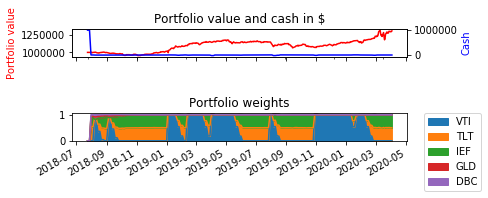

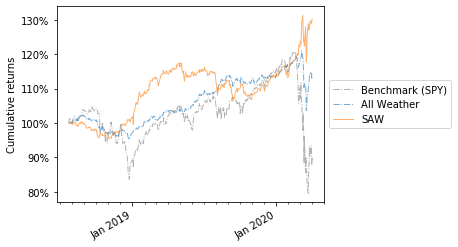

In [0]:
from algorithms import CRBAlgorithm
from algorithms import TradingSignalAlgorithm
a_dalio = CRBAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER")
bm_all_weather = run("All Weather", a_dalio, bundle_name, start, end, capital_base, analyze=False)

# 'VTI' - stock, 'TLT' - long-term bond, 'IEF'- medium-term bond, 'GLD'- commodity, 'DBC'- commodities
def saw_trading_fn(stock, date, lookback):
    stockname = stock.symbol
    df = social_media
    yesterday_date = date - pd.Timedelta(days=1)
    yesterday_social_media = df.iloc[df.index.get_loc(yesterday_date, method='nearest')]
    
    # if sent12 > sent26 -> bullish --> buy stocks, sell bonds
    # if sent12 < sent26 -> sell --> sell stocks, buy bonds
    buzz = yesterday_social_media['buzz']
    sentiment = yesterday_social_media['sent12'] - yesterday_social_media['sent26']
    
    # just try some parameters
    signal = 0
    if stockname not in ['GLD', 'DBC']:
        if sentiment > 0: signal = 0.5 if stockname in ['VTI'] else -0.5
        elif sentiment < 0: signal = -0.3 if stockname in ['VTI'] else 0.3
                
    return signal
    


a_saw = TradingSignalAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
                                       rebalance_freq=trade_freq, trading_signal=saw_trading_fn, 
                                      initial_weights=[0.3,0.4,0.15,0.075,0.075], normalise_weights=True)

# if ('perfTS' not in locals()): perfTS = []
a_saw_results = run("SAW", a_saw, bundle_name, start, end, capital_base)
# perfTS.append(a_all_weather_results)

plot_rolling_returns_from_perf_array([bm_all_weather, a_saw_results], bm_returns, extra_bm=1)
print_table_from_perf_array([bm_all_weather, a_saw_results], bm_returns, True)

Since this looks promising (Annual returns of 16.9%, and max draw-down of only 10% despite the covid-19 market crash), let's see if we can optimise the parameters

Let's use Genetic Algorithm (GA) to optimise parameters

Genetic Algorithm. Fitness: FitnessMax, for 10 generations of 5 population each. Seed=105


d:\users\edmund\anaconda3\envs\roboadvisor\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
d:\users\edmund\anaconda3\envs\roboadvisor\lib\site-packages\empyrical\stats.py:711: RuntimeWarning: invalid value encountered in true_divide
  out=out,


<IPython.core.display.Javascript object>


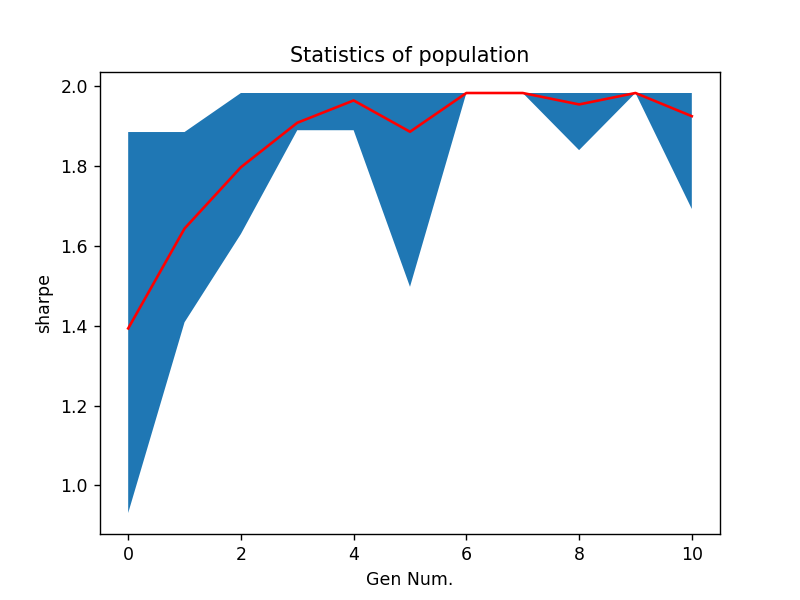

In [0]:
# %matplotlib notebook
# import sys
# sys.path.append('..')  # add parent folder to sys path
# import ga
# ga.example(npop=5, ngen=10, filepath="../data/twitter/sentiments_overall_daily.csv")
# print()

In [0]:
%matplotlib notebook

import sys
sys.path.append('..')  # add parent folder to sys path

import ga
import pickle
from collections import OrderedDict

# Let's train based on data prior to 2020-01-01, and test on data after that.
# This will test whether the optimised parameters are robust and able to perform in the covid-19 market crash
train_start = tz.localize(datetime.strptime(args['start_date'], '%Y-%m-%d'))
train_end = tz.localize(datetime.strptime('2020-01-01', '%Y-%m-%d'))
test_start = tz.localize(datetime.strptime('2020-01-02', '%Y-%m-%d'))
test_end = tz.localize(datetime.strptime(args['end_date'], '%Y-%m-%d'))

stocks = ['VTI', 'TLT', 'IEF', 'GLD', 'DBC']  # list of stocks used by All-Weather

NPOP = 500
NGEN = 50
seed = 600
opt_type = "saw"
objective = "max_ret"  # max_sharpe, max_ret, min_vol
toSolve = True

# ---------------------------------------------------

pickle_name = f"{opt_type.upper()}_GA_{objective.upper()}"

kpi_map = {
    "max_ret": "algorithm_period_return",
    "max_sharpe": "sharpe",
    "min_vol": "algo_volatility"
}

kwargs = {"social_media": social_media, "bundle_name": bundle_name, 
          "train_start": train_start, "train_end": train_end, "capital_base": capital_base, 
          "trade_freq": trade_freq, "kpi": kpi_map.get(objective, "sharpe")}

if toSolve:
    if (objective != "min_vol"):
        top10, log, hof = ga.run_saw_ga("FitnessMax", NPOP, NGEN, pickle_name, 
                                    eval_fn=ga.eval_final_perf, stocks=stocks, seed=seed, **kwargs)
    else:
        top10, log, hof = ga.run_saw_ga("FitnessMin", NPOP, NGEN, pickle_name, 
                                    eval_fn=ga.eval_min_vol, stocks=stocks, seed=seed, **kwargs)
        
else:
    with open(f"{pickle_name}.pickle", "rb+") as f:
        top10 = pickle.load(f)    

best = top10[0]
w = OrderedDict()
i = 0

for s in stocks:
    w[s] = {"p": best[i], "n": best[i+1]}
    i = i + 2

Genetic Algorithm. Fitness: FitnessMax, for 50 generations of 500 population each. Seed=600


/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


<IPython.core.display.Javascript object>

GA-optmised SAW for max_ret


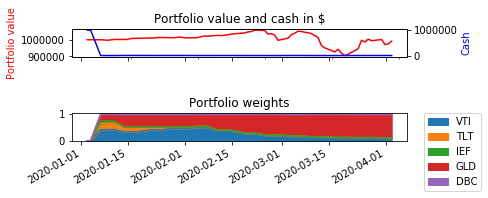

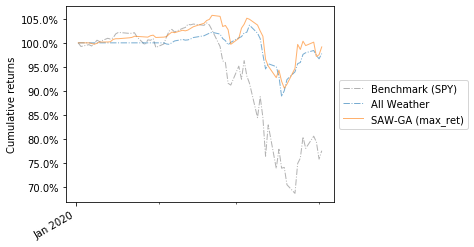

In [0]:
# Test on out-of-sample data
%matplotlib inline

algo_saw = TradingSignalAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
                                   rebalance_freq=trade_freq, trading_signal=ga.saw_ga_trading_fn, 
                                  initial_weights=[0.3,0.4,0.15,0.075,0.075], normalise_weights=True, 
                                      **{"weights": w, "social_media": social_media})

print(f"GA-optmised SAW for {objective}")
saw_ga_test = run(f"SAW-GA ({objective})", algo_saw, bundle_name, test_start, test_end, capital_base, analyze=True)

print()
bm_test = get_benchmark_returns(args['benchmark'], test_start, test_end)  # requires network connection
bm_test.name = 'Benchmark (%s)' % args['benchmark']

a_dalio = CRBAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER")
bm_aw_test = run("All Weather", a_dalio, bundle_name, test_start, test_end, capital_base, analyze=False)


ax = plot_rolling_returns_from_perf_array([bm_aw_test, saw_ga_test], bm_test, extra_bm=1)
print_table_from_perf_array([bm_aw_test, saw_ga_test], bm_test, True)

GA-optmised SAW for max_sharpe


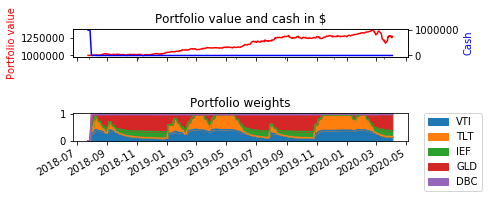

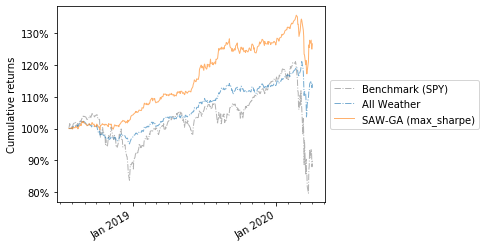

In [0]:
# Test on entire period
print(f"GA-optmised SAW for {objective}")
saw_ga_all = run(f"SAW-GA ({objective})", algo_saw, bundle_name, train_start, test_end, capital_base, analyze=True)

plot_rolling_returns_from_perf_array([bm_all_weather, saw_ga_all], bm_returns, extra_bm=1)
print_table_from_perf_array([bm_all_weather, saw_ga_all], bm_returns, True)

---

We can repeat the above for different objectives (eg maximise returns, minimise volatility, etc) and for various population size, generations, and random seed... 

After running for multiple times, let's compare all the results

In [0]:
from ga import compareResults

# opt_type = "saw"
# objective = "max_sharpe"  # max_sharpe, max_ret, min_vol
# base_name = f"{opt_type.upper()}_GA_{objective.upper()}"

kwargs = {"social_media": social_media, "bundle_name": bundle_name, 
          "train_start": train_start, "train_end": train_end, 
          "test_start": test_start, "test_end": test_end, 
          "capital_base": capital_base, 
          "stocks": stocks, "trade_freq": trade_freq}

test_ga_mr, all_ga_mr = compareResults(base_name="SAW_GA_MAX_RET", opt_type=opt_type, prefix="MR", **kwargs)
test_ga_ms, all_ga_ms = compareResults(base_name="SAW_GA_MAX_SHARPE", opt_type=opt_type, prefix="MS", **kwargs)
test_ga_mv, all_ga_mv = compareResults(base_name="SAW_GA_MIN_VOL", opt_type=opt_type, prefix="MV", **kwargs)

In [0]:
test_ga = test_ga_mr + test_ga_ms + test_ga_mv
all_ga = all_ga_mr + all_ga_ms + all_ga_mv

Test on out-of-sample data


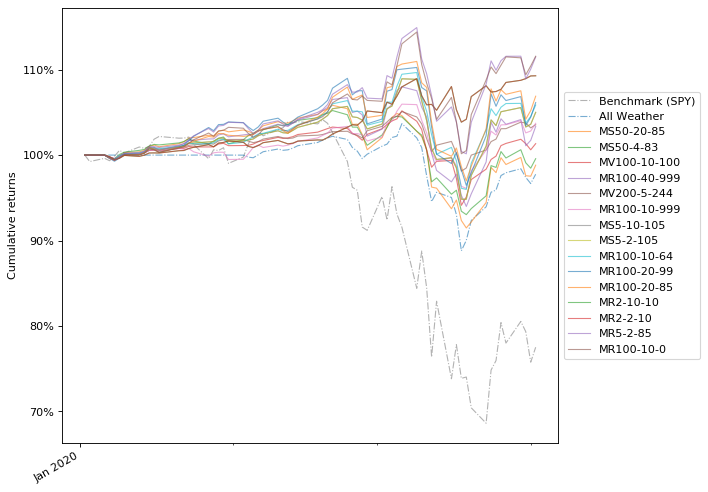

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


# sort by performance (cumulative returns)
all_ga.sort(key=lambda x: x[1]['algorithm_period_return'][-1].item(), reverse=False)
test_ga.sort(key=lambda x: x[1]['algorithm_period_return'][-1].item(), reverse=False)

all = [bm_all_weather] + all_ga
test = [bm_aw_test] + test_ga

print('Test on out-of-sample data')
plot_rolling_returns_from_perf_array(test, bm_test, extra_bm=1)
print_table_from_perf_array(test, bm_test, True)

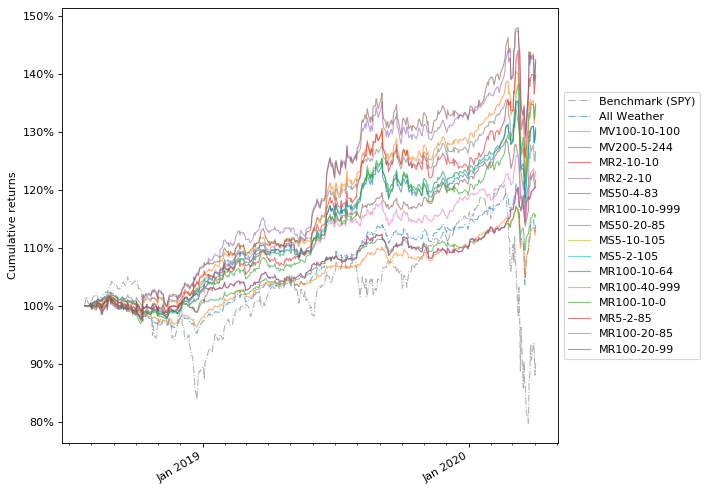

In [0]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plot_rolling_returns_from_perf_array(all, bm_returns, extra_bm=1)
print_table_from_perf_array(all, bm_returns, True)

We can see that SAW-GA (All-Weather with Sentiments as trading signals, optimised via GA) has resulted in better performance

For All-Weather, we can see that annual, cumulative returns, sharpe ratio are better than the baseline SPY.
But with SAW-GA (Max Returns), we can see that these metrics are even better!

And for risk-adverse individuals, looking to minimise volatility, we can see that SAW-GA (Min Volatility) achieves lower annual volatility, and better max drawdown as compared to All-Weather and the benchmark, while maintaining decent annual returns that still beat the benchmark!

---
---

👷‍♂️ WIP 👷‍♂️

Use Modern Portfolio Theory, but use trading signals to adjust upper and lower bounds of 'risk'.

Let's call this "Sentimental MPT" (SMPT)

Baseline: Modern Portfolio Theory

In [0]:
import sys
sys.path.append('..')  # add parent folder to sys path

import pytz
from datetime import datetime
import pandas as pd
from yahoofinancials import YahooFinancials
import numpy as np

# illustrate theory
tz = pytz.timezone('US/Mountain')
t_end = tz.localize(datetime.strptime('2020-01-01', '%Y-%m-%d'))  # pd.Timestamp.utcnow()
t_start = t_end - 2500 * pd.tseries.offsets.BDay()

stocks = ['VTI', 'TLT', 'IEF', 'GLD', 'DBC']  # list of stocks used by All-Weather

yahoo_financials = YahooFinancials(stocks)
aw_data = yahoo_financials.get_historical_price_data(
    t_start.strftime('%Y-%m-%d'), 
    t_end.strftime('%Y-%m-%d'), 
    'daily'
)

SIZE = 100
df_data_all = {}
df_data = {} # only last n

for i in range(len(stocks)):
    df_data_all[i] = pd.DataFrame(aw_data[stocks[i]]['prices']).filter(['formatted_date', 'adjclose'])    
    df_data[i] = pd.DataFrame(aw_data[stocks[i]]['prices'])[-(SIZE+1):].filter(['formatted_date', 'adjclose'])
    
prices = pd.DataFrame(np.column_stack(tuple(df_data[i]['adjclose'] for i in range(len(stocks)))), columns=stocks)

In [0]:
from pypfopt.base_optimizer import portfolio_performance
from utils import generate_markowitz_bullet, get_mu_sigma, optimal_portfolio
import matplotlib.pyplot as plt

# Get mu and S from prices
mu, S = get_mu_sigma(prices)

# w_max_sharpe, _, _ = optimal_portfolio(mu, S, "max_sharpe", get_entire_frontier=False)
w_max_sharpe, opt_ret, opt_risk = optimal_portfolio(mu, S, "max_sharpe", get_entire_frontier=True)
r_ms, v_ms, _ = portfolio_performance(mu, S, w_max_sharpe)
print(v_ms)

# adjust expected volatility - If bullish, we will take more risk/volatility, if bearish, we will take less risk/volatility
vol = [-0.1, -0.05, -0.01, 0.01, 0.05, 0.10]
vol = [v_ms*(1+v) for v in vol]

fig, ax = plt.subplots(figsize=(10, 6))
_ = generate_markowitz_bullet(prices, ax=ax, verbose=False)

for v in vol:
#     print(v)
    weights, _, _ = optimal_portfolio(mu, S, "efficient_risk", get_entire_frontier=False, **{"target_volatility": v})
    r, v, _ = portfolio_performance(mu, S, weights)
    ax.plot(v, r, '*', markersize=10, label=f"Risk-adjusted ({v:.4})")
ax.legend()


In [0]:
from algorithms import OptAlgorithm, run

a_mpt = OptAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
                      collect_before_trading=False, history=args['history'], objective='max_sharpe')
bm_mpt = run("MPT (Max Sharpe)", a_mpt, bundle_name, start, end, capital_base, analyze=False)


# a_smpt = OptAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
#                       collect_before_trading=False, history=args['history'], objective='max_sharpe')

In [0]:
%matplotlib notebook

import sys
sys.path.append('..')  # add parent folder to sys path

import ga
import pickle
from collections import OrderedDict

# Let's train based on data prior to 2020-01-01, and test on data after that.
# This will test whether the optimised parameters are robust and able to perform in the covid-19 market crash
train_start = tz.localize(datetime.strptime(args['start_date'], '%Y-%m-%d'))
train_end = tz.localize(datetime.strptime('2020-01-01', '%Y-%m-%d'))
test_start = tz.localize(datetime.strptime('2020-01-02', '%Y-%m-%d'))
test_end = tz.localize(datetime.strptime(args['end_date'], '%Y-%m-%d'))

stocks = ['VTI', 'TLT', 'IEF', 'GLD', 'DBC']  # list of stocks used by All-Weather

NPOP = 200
NGEN = 5
seed = 2020
opt_type = "smpt"
objective = "max_ret"  # max_sharpe, max_ret, min_vol
toSolve = False

# ---------------------------------------------------
# SMPT_GA_MAX_RET
pickle_name = f"{opt_type.upper()}_GA_{objective.upper()}"

kpi_map = {
    "max_ret": "algorithm_period_return",
    "max_sharpe": "sharpe",
    "min_vol": "algo_volatility"
}

kwargs = {"social_media": social_media, "bundle_name": bundle_name, 
          "train_start": train_start, "train_end": train_end, "capital_base": capital_base, 
          "trade_freq": trade_freq, "kpi": kpi_map.get(objective, "sharpe")}

if toSolve:
    top10, log, hof = ga.run_smpt_ga("FitnessMax", NPOP, NGEN, pickle_name, 
                                    eval_fn=ga.eval_final_perf, stocks=stocks, seed=seed, **kwargs)
else:
    with open(f"{pickle_name}.pickle", "rb+") as f:
        top10 = pickle.load(f)    

        
best = top10[0]
w_smpt = best

MPT (Max Sharpe)


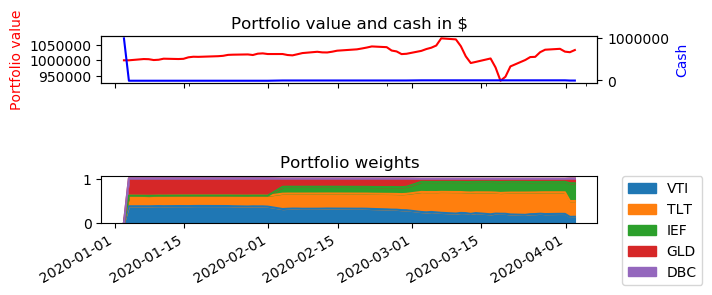

GA-optimised SMPT for max_ret


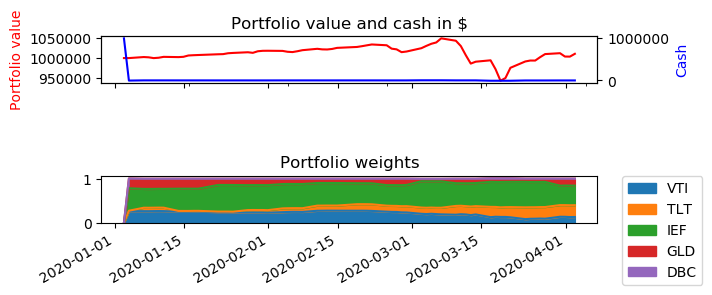

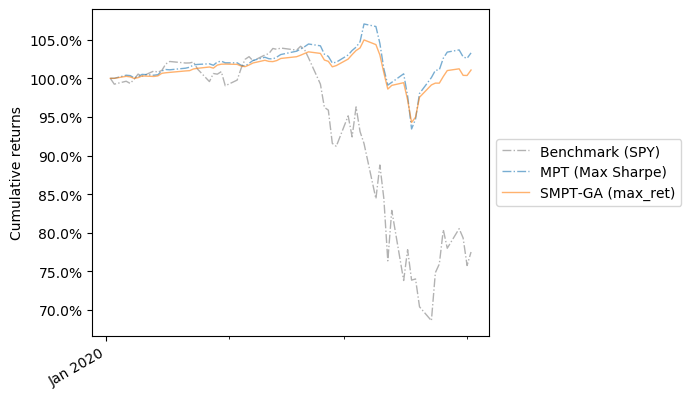

In [0]:
%matplotlib inline

# Test on out-of-sample data
plt.style.use('default')
print(f"MPT (Max Sharpe)")
bm_mpt_test = run("MPT (Max Sharpe)", a_mpt, bundle_name, test_start, test_end, capital_base, analyze=True)

bm_test = get_benchmark_returns(args['benchmark'], test_start, test_end)  # requires network connection
bm_test.name = 'Benchmark (%s)' % args['benchmark']


algo_smpt = OptAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
                         collect_before_trading=False, history=args['history'],
                        rebalance_freq=trade_freq, mpt_adjustment=ga.smpt_ga_trading_fn,
                        **{"weights": w_smpt, "social_media": social_media})
print(f"GA-optimised SMPT for {objective}")
smpt_ga_test = run(f"SMPT-GA ({objective})", algo_smpt, bundle_name, test_start, test_end, capital_base, analyze=True)

plot_rolling_returns_from_perf_array([bm_mpt_test, smpt_ga_test], bm_test, extra_bm=1)
print_table_from_perf_array([bm_mpt_test, smpt_ga_test], bm_test, True)

GA-optimised SMPT for max_ret


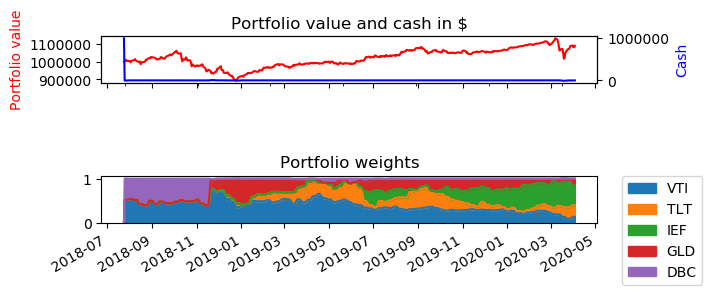

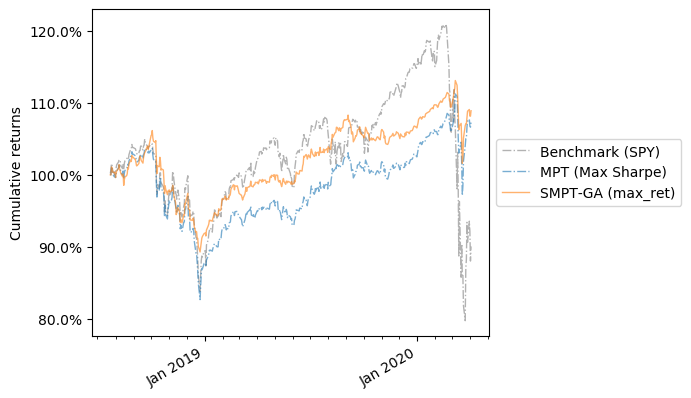

In [0]:
# Test on entire period
a_mpt = OptAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
                      collect_before_trading=False, history=args['history'], objective='max_sharpe')
bm_mpt = run("MPT (Max Sharpe)", a_mpt, bundle_name, train_start, test_end, capital_base, analyze=False)

bm = get_benchmark_returns(args['benchmark'], train_start, test_end)  # requires network connection
bm.name = 'Benchmark (%s)' % args['benchmark']


algo_smpt = OptAlgorithm(verbose=False, grp="DALIO", subgrp="ALL_WEATHER", 
                         collect_before_trading=False, history=args['history'],
                        rebalance_freq=trade_freq, mpt_adjustment=ga.smpt_ga_trading_fn,
                        **{"weights": w_smpt, "social_media": social_media})
print(f"GA-optimised SMPT for {objective}")
smpt_ga_all = run(f"SMPT-GA ({objective})", algo_smpt, bundle_name, train_start, test_end, capital_base, analyze=True)

plot_rolling_returns_from_perf_array([bm_mpt, smpt_ga_all], bm, extra_bm=1)
print_table_from_perf_array([bm_mpt, smpt_ga_all], bm, True)

In [0]:
from ga import compareResults

opt_type = "smpt"
# objective = "max_ret"  # max_sharpe, max_ret, min_vol
# base_name = f"{opt_type.upper()}_GA_{objective.upper()}"

kwargs = {"social_media": social_media, "bundle_name": bundle_name, 
          "train_start": train_start, "train_end": train_end, 
          "test_start": test_start, "test_end": test_end, 
          "capital_base": capital_base, 
          "stocks": stocks, "trade_freq": trade_freq
         }

test_smpt_mr, all_smpt_mr = compareResults(base_name=f"{opt_type.upper()}_GA_MAX_RET", opt_type=opt_type, prefix="MR", **kwargs)
test_smpt_ms, all_smpt_ms = compareResults(base_name=f"{opt_type.upper()}_GA_MAX_SHARPE", opt_type=opt_type, prefix="MS", **kwargs)

In [0]:
test_smpt = test_smpt_mr + test_smpt_ms
all_smpt = all_smpt_mr + all_smpt_ms

Test on out-of-sample data


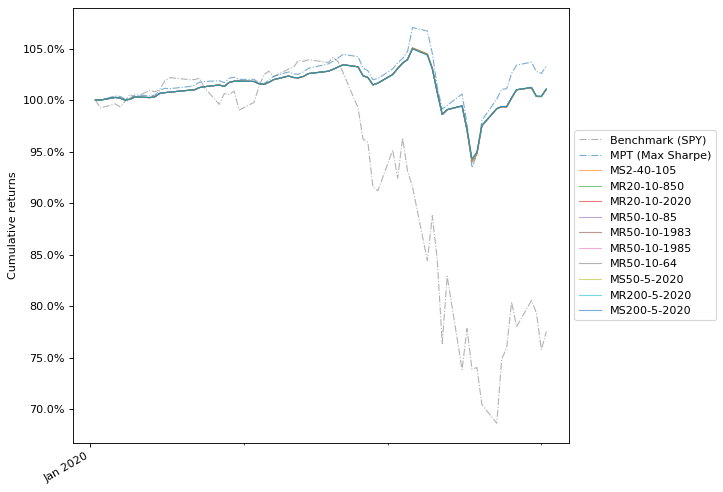

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


# sort by performance (cumulative returns)
all_smpt.sort(key=lambda x: x[1]['algorithm_period_return'][-1].item(), reverse=False)
test_smpt.sort(key=lambda x: x[1]['algorithm_period_return'][-1].item(), reverse=False)

all = [bm_mpt] + all_smpt
test = [bm_mpt_test] + test_smpt

print('Test on out-of-sample data')
plot_rolling_returns_from_perf_array(test, bm_test, extra_bm=1)
print_table_from_perf_array(test, bm_test, True)

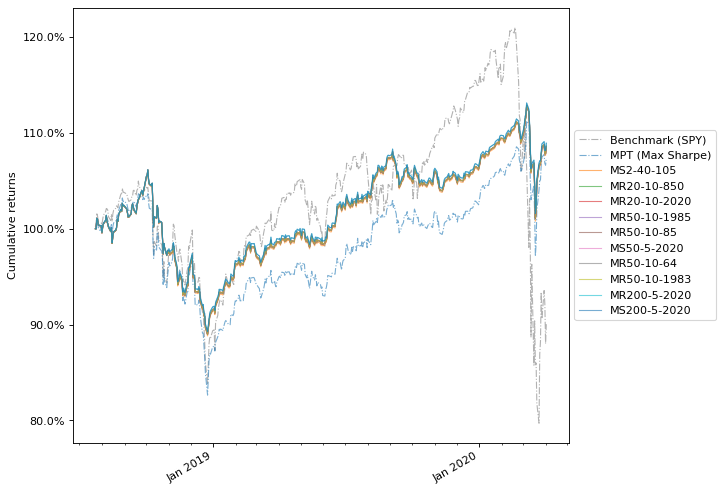

In [0]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plot_rolling_returns_from_perf_array(all, bm_returns, extra_bm=1)
print_table_from_perf_array(all, bm_returns, True)

It appears that SMPT-GA (MPT with Sentiments as trading signals, optimised via GA) tended to converge to certain parameters and performance, which was only slightly better than MPT (Max Sharpe) for the entire period, and in fact, fared worse for the out-of-sample period!

# Testing area

### Toy-example for Modern Portfolio Theory (MPT) 
Modern portfolio theory applied on randomly-generated returns for a number of assets

Adapted from https://www.quantopian.com/posts/the-efficient-frontier-markowitz-portfolio-optimization-in-python

In [0]:
import sys
sys.path.append('..')  # add parent folder to sys path

import numpy as np
import pandas as pd
from utils import optimal_portfolio, generate_markowitz_bullet
from pypfopt import expected_returns

n_assets = 4 # number of different stocks
n_obs = 1000 # number of history points to take mean of
return_vec = np.random.randn(n_obs, n_assets) # randomly create returns

prices_ = expected_returns.prices_from_returns(pd.DataFrame(return_vec))
_ = generate_markowitz_bullet(prices_, num_random=20000, plot_individual=False)

### Modern Portfolio Theory (MPT) applied on actual stocks
Using assets selected in Vanguard ETF strategic model portfolios (Core Series), according to
https://advisors.vanguard.com/iwe/pdf/FASINVMP.pdf

In [0]:
import pandas as pd
from yahoofinancials import YahooFinancials  # https://github.com/JECSand/yahoofinancials

end = tz.localize(datetime.strptime('2020-01-01', '%Y-%m-%d'))  # pd.Timestamp.utcnow()
start = end - 2500 * pd.tseries.offsets.BDay()

# Vanguard Core Series
tickers = ['VTI', 'VXUS', 'BND', 'BNDX']

yahoo_financials = YahooFinancials(tickers)
data = yahoo_financials.get_historical_price_data(
    start.strftime('%Y-%m-%d'), 
    end.strftime('%Y-%m-%d'), 
    'daily'
)

In [0]:
import plotly.graph_objects as go
import numpy as np

SIZE = 100
data_title = 'VANGUARD Core Series'

df_data_all = {}
df_data = {} # only last n

for i in range(len(tickers)):
    df_data_all[i] = pd.DataFrame(data[tickers[i]]['prices']).filter(['formatted_date', 'adjclose'])    
    df_data[i] = pd.DataFrame(data[tickers[i]]['prices'])[-(SIZE+1):].filter(['formatted_date', 'adjclose'])
    
# returns_V = np.column_stack((df1, df2, df3, df4))
returns_V = np.column_stack(tuple(df_data[i]['adjclose'] for i in range(len(tickers))))
returns_V = np.diff(returns_V, axis=0) / returns_V[1:,:] * 100
print('Shape of returns:', returns_V.shape)
print(returns_V[0:5])

# Plot historical data
fig = go.Figure()
for i in range(len(tickers)):
    fig.add_trace(go.Scatter(x=df_data_all[i]['formatted_date'], 
                             y=df_data_all[i]['adjclose'], 
                             name=tickers[i], 
#                              line_color='deepskyblue', 
                             opacity=0.8))
    
# Use date string to set xaxis range
fig.update_layout(xaxis_range=[start.strftime('%Y-%m-%d'), end.strftime('%Y-%m-%d')],
                   title_text="Components in %s" % data_title)
fig.show()

In [0]:
# Markowitz bullet representation inspired from 
# https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f

import pandas as pd
import numpy as np
from utils import generate_markowitz_bullet, get_mu_sigma

prices = pd.DataFrame(np.column_stack(tuple(df_data[i]['adjclose'] for i in range(len(tickers)))), columns=tickers)
_ = generate_markowitz_bullet(prices)

In [0]:
from pypfopt.base_optimizer import portfolio_performance
import matplotlib.pyplot as plt
from utils import get_mu_sigma


# VTI, VXUS, BND, BNDX
core_series_allocation = {
    0: (0, 0, 0.686, 0.294),
    1: (0.059, 0.039, 0.617, 0.265),
    2: (0.118, 0.078, 0.549, 0.235),
    3: (0.176, 0.118, 0.480, 0.206),
    4: (0.235, 0.157, 0.412, 0.176),
    5: (0.294, 0.196, 0.343, 0.147),
    6: (0.353, 0.235, 0.274, 0.118),
    7: (0.412, 0.274, 0.206, 0.088),
    8: (0.470, 0.314, 0.137, 0.059),
    9: (0.529, 0.353, 0.069, 0.029),
    10: (0.588, 0.392, 0, 0)
}

# Get mu and S from prices
mu, S = get_mu_sigma(prices)

# Plot different risk-level portfolios from Vanguard Core Series on same graph
for k,allocation in core_series_allocation.items():
    returns, volatility, _ = portfolio_performance(mu, S, allocation)
    plt.plot(volatility, returns, 'o', markersize=5, label='%i%% Equity' % (k*10))
    
plt.xlabel('volatility')
plt.ylabel('returns')
plt.title('Vanguard Core Series')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
print()


In [0]:
import os
import sys
sys.path.append('../models/lstm_nn')  # add parent folder to sys path
# os.chdir('../models/lstm_nn')

import json
import math
import matplotlib.pyplot as plt
from core.data_processor import DataLoader
from core.model import Model

toTrain = False

# get LSTM configuration details from config.json
configs = json.load(open('config.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])

data = DataLoader(
    os.path.join('data', configs['data']['filename']),
    configs['data']['train_test_split'],
    configs['data']['columns']
)

# train model
if toTrain:
    model = Model()
    model.build_model(configs)
    x, y = data.get_train_data(
        seq_len=configs['data']['sequence_length'],
        normalise=configs['data']['normalise']
    )

    '''
    # in-memory training
    model.train(
        x,
        y,
        epochs = configs['training']['epochs'],
        batch_size = configs['training']['batch_size'],
        save_dir = configs['model']['save_dir']
    )
    '''
    # out-of memory generative training
    steps_per_epoch = math.ceil((data.len_train - configs['data']['sequence_length']) / configs['training']['batch_size'])
    model.train_generator(
        data_gen=data.generate_train_batch(
            seq_len=configs['data']['sequence_length'],
            batch_size=configs['training']['batch_size'],
            normalise=configs['data']['normalise']
        ),
        epochs=configs['training']['epochs'],
        batch_size=configs['training']['batch_size'],
        steps_per_epoch=steps_per_epoch,
        save_dir=configs['model']['save_dir']
    )


else:
    # Get predictions
    import glob
    list_of_files = glob.glob(configs['model']['save_dir'] + '/*h5') # * means all if need specific format then *.csv
    latest_file = max(list_of_files, key=os.path.getctime)

    model_use = Model()
    model_use.load_model(latest_file)    
    
    x_test, y_test = data.get_test_data(
        seq_len=configs['data']['sequence_length'],
        normalise=configs['data']['normalise']
    )
    
    
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.legend()
	# Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.show()

In [0]:
predictions = model_use.predict_sequences_multiple(x_test, configs['data']['sequence_length'], configs['data']['sequence_length'])
# predictions = model.predict_sequence_full(x_test, configs['data']['sequence_length'])
# predictions = model.predict_point_by_point(x_test)

plot_results_multiple(predictions, y_test, configs['data']['sequence_length'])

In [0]:
from IPython.display import display, HTML, Javascript
data = [dict(name='foo', value='YES'),
        dict(name='bar', value='NO'),
        dict(name='baz', value='NO'),
        dict(name='foobar', value='YES')]
df = pd.DataFrame(data)

html = df.to_html(classes='my_class')

h = HTML('''
        <style>
            .df tbody tr:last-child { background-color: #FF0000; }
        </style>
        ''' + df.to_html(classes='df'))
# a = Javascript('''$('.my_class tbody tr').filter(':last')
#                                              .css('background-color', '#FF0000');
#                    ''')

display(h)
# display(HTML(html))

